At the heart of the logistic regression model is the sigmoid curve, which is used to produce the probability (between 0 and 1) of the input data belonging to the first group. This sigmoid curve is the exact same curve used in the sigmoid activation function of a neural network. In fact, a basic neural network using the sigmoid activation function is effectively a logistic regression model

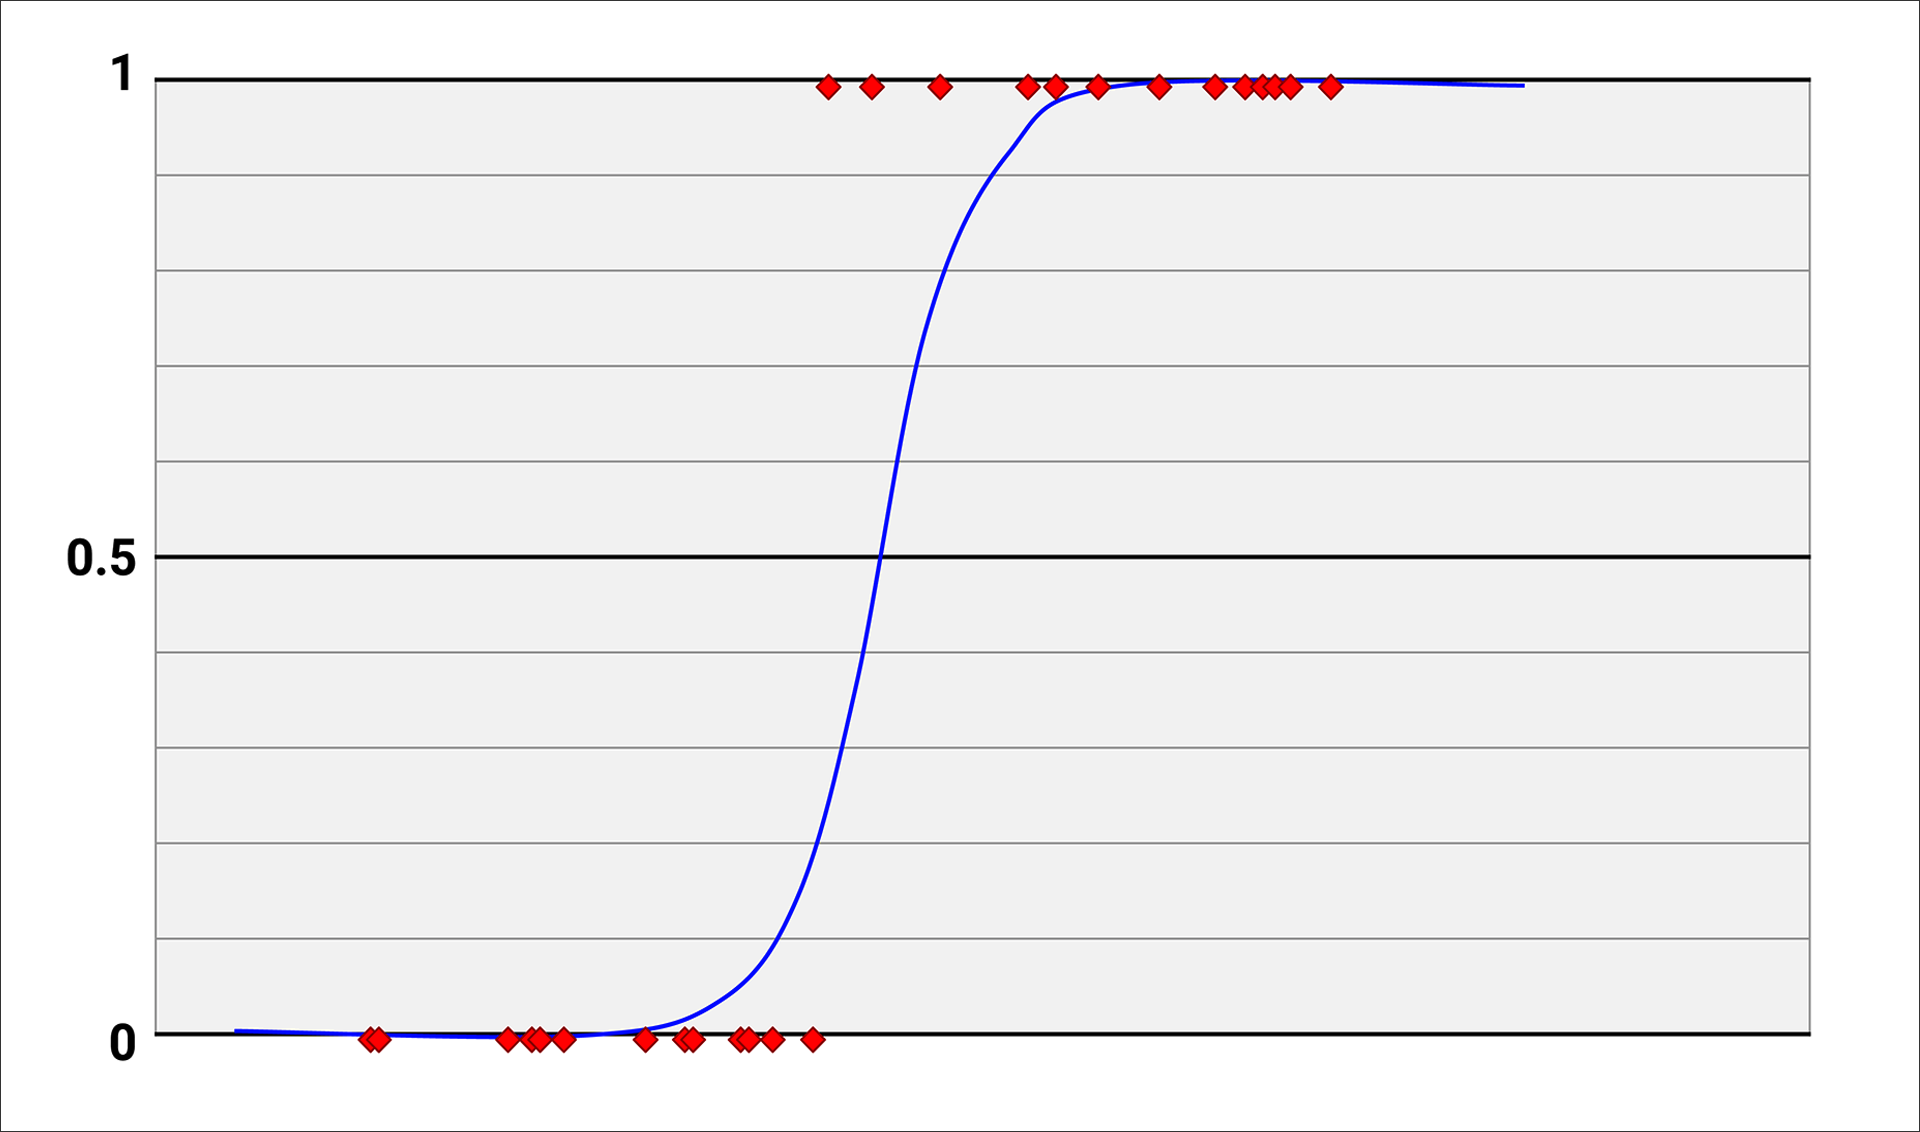

To demonstrate how similar the logistic regression and basic neural network models are in terms of performance, we'll build and evaluate both models using the same training/testing dataset.

This dataset is from the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) and contains the patient information of 786 women. It is used as a real-world practice dataset to build a predictive diagnostic model. Since there are only 786 data points across eight features, this dataset is well suited for a logistic regression model, but still large enough to build a neural network model.

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

# Import our input dataset
diabetes_df = pd.read_csv('./resources/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Now that we have our dataset loaded into Pandas, we need to prepare the data to train both models. With our logistic regression model, there is no preprocessing or scaling required for the data. However, our basic neural network needs the numerical variables standardized. Therefore, we'll need to keep track of a scaled and unscaled training dataset such that both models have the correct input data in their preferred formats. To split the data:

In [2]:
# Remove diabetes outcome target from features data
y = diabetes_df.Outcome
X = diabetes_df.drop(columns="Outcome")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

We need to standardize the numerical variables using Scikit-learn's **StandardScaler** class.

In [3]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Now we're ready to train and evaluate our models. We'll first start with our logistic regression model.

For our purposes, we'll use our basic logistic regression parameters, which include:

- The **solver** parameter is set to **'lbfgs'**, which is an algorithm for learning and optimization. The particular solver isn't very important in this example, but note that a number of optimizers exist.
- The **max_iter** parameter will be set to 200 iterations, which will give the model sufficient opportunity to converge on effective weights

In [4]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.729


Next, we need to build, compile, and evaluate our basic neural network model. Again, we'll use our typical binary classifier parameters:

- Our single hidden layer will have an **input_dim** equal to 8, 16 neuron **units**, and will use the **relu** activation function.
- The loss function should be **binary_crossentropy**, using the **adam** optimizer.
- Our model should provide the additional **accuracy** scoring metric and train over a maximum of 50 epochs.

NOTE:
Compared to the 200 training iterations for our logistic regression model, we'll only train our neural network model through 50 epochs—this will limit the risk of overfitting our model.

In [5]:
# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
18/18 [==============================] - 0s 1ms/step - loss: 0.7350 - accuracy: 0.4688
Epoch 2/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5226
Epoch 3/50
18/18 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.5747
Epoch 4/50
18/18 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.6337
Epoch 5/50
18/18 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.6597
Epoch 6/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5904 - accuracy: 0.6840
Epoch 7/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5747 - accuracy: 0.6997
Epoch 8/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5608 - accuracy: 0.7049
Epoch 9/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5492 - accuracy: 0.7153
Epoch 10/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5389 - accuracy: 0.7135
Epoch 11/50
18/18 [

If we compare both model's predictive accuracy, their output is very similar. Either model was able to predict whether or not a patient is diagnosed with diabetes more than 70% of the time.

Beyond the performance of both models, there are a few other factors to consider when selecting a model for your data. First, neural networks are prone to overfitting and can be more difficult to train than a straightforward logistic regression model. Therefore, if you are trying to build a classifier with limited data points (typically fewer than a thousand data points), or if your dataset has only a few features, neural networks may be overcomplicated. Additionally, logistic regression models are easier to dissect and interpret than their neural network counterparts, which tends to put more traditional data scientists and non-data experts at ease. In contrast, neural networks (and especially deep neural networks) thrive in large datasets. Datasets with thousands of data points, or datasets with complex features, may overwhelm the logistic regression model, while a deep learning model can evaluate every interaction within and across neurons. Therefore, the decision between using a logistic regression model and basic neural network model is nuanced and, in most cases, a matter of preference for the data scientist.